### 1, Who we are

Wordcounter is a code snippet, which takes in the cats_txt text, digests it and gives back the count of all words and punctuations appearing in decreasing order.

### 2, How we do it?

#### Open, read in and close file

In [1]:
with open('cats_txt.txt', encoding = 'unicode_escape') as f:
    lines = f.readlines()
f.close()

#### Remove linebreakes and other unecessary formatting

In [2]:
import re
spaced = [re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', text) for text in lines]
removed = [re.sub('\s+', ' ', s).lower() for s in spaced]

#### Count words and put the counts into a dictionary

In [3]:
import nltk
count_words = dict()

for sentence in removed:
    tokenized = nltk.word_tokenize(sentence)
    words = [word for word in tokenized]
    
    for word in words:
        if word in count_words.keys():                
            count_words[word] += 1                
        else:
            count_words[word] = 1 # this is the first occurence

#### Transform the dictionary into a list that can be ordered

In [4]:
count_words_list = []
for k,v in count_words.items():
    count_words_list.append([k, v])
count_words_list.sort(key = lambda x:x[1], reverse = True)

#### Print the result

In [6]:
print(count_words_list[:20])

[[',', 455], ['the', 401], ['.', 357], ['[', 266], [']', 266], ['and', 252], ['of', 243], ['to', 212], ['a', 208], ['cats', 190], ['in', 182], ['cat', 144], ['as', 97], ['are', 95], ['is', 92], ['with', 73], ['that', 60], ['their', 58], ['domestic', 53], ['on', 52]]


### Why this would be fun?

In natural language processing it is often necessary to get the frequencies of all words (or rather stems or lemmas) so it is useful to have an approximate idea how this is done behind the scenes, even if the code might be already involved in the package. Also useful to see what could go wrong, here for example there were plenty of escape characters and special characters that are better to be filtered out right away.

### Proof:

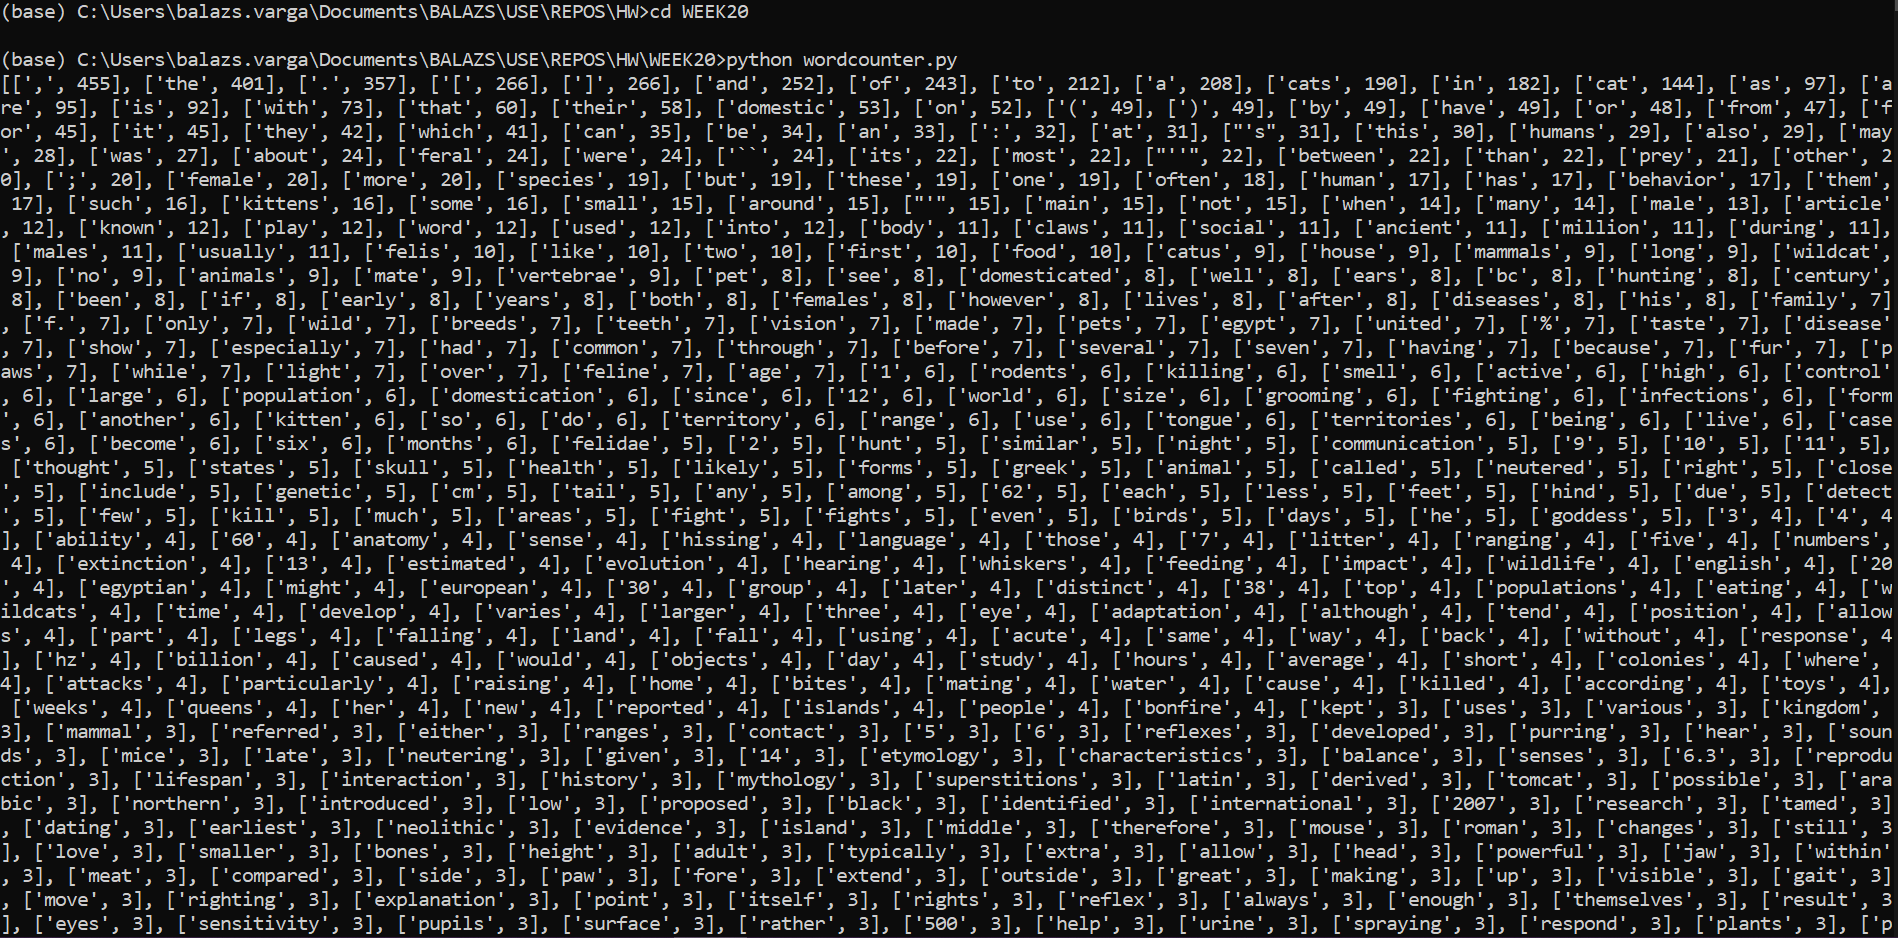

![PROOF2.PNG](https://github.com/VRBlaise/HW/blob/main/WEEK20/PROOF2.PNG)